In [1]:
import matplotlib.pyplot as plt
import numpy as np

/home/jamie/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
class PIDController:
    def __init__(self, Kp, Ki, Kd):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.prev_error = 0.0
        self.integral = 0.0

    def compute_control_output(self, error: float, dt: float) -> float:
        """
        Given an error and a difference in time, calculate the total control output.
        Update the class variable `previous_error`.
        :param error:
        :param dt:
        :return total_output:
        """        

        # Calculate proportional output
        proportional_output = self.Kp * error
        
        # Calculate integral output
        self.integral += error * dt
        integral_output = self.Ki * self.integral

        # Calculate derivative output
        rate_of_change_of_error = (self.prev_error - error) / dt
        derivative_output = self.Kd * rate_of_change_of_error

        # Calculate total output
        total_output = proportional_output + integral_output + derivative_output
        self.prev_error = error
        return total_output

In [3]:
class DCMotor:
    def __init__(self, K, J, b):
        self.K = K  # Motor constant
        self.J = J  # Motor inertia
        self.b = b  # Friction coefficient

    def update_speed(self, voltage, dt):
        torque = self.K * voltage
        acceleration = (torque - self.b) / self.J
        delta_speed = acceleration * dt
        return delta_speed

In [4]:
def simulate_motor_response(motor, voltage_input, total_time, dt):
    time = 0
    speed = 0  # Initial speed
    speeds = [speed]
    
    while time < total_time:
        delta_speed = motor.update_speed(voltage_input, dt)
        speed += delta_speed
        speeds.append(speed)
        time += dt
    
    return speeds

# Example usage
motor = DCMotor(K=0.1, J=0.01, b=0.05)
voltage_input = 5.0
total_time = 10  
dt = 0.1

speeds = simulate_motor_response(motor, voltage_input, total_time, dt)

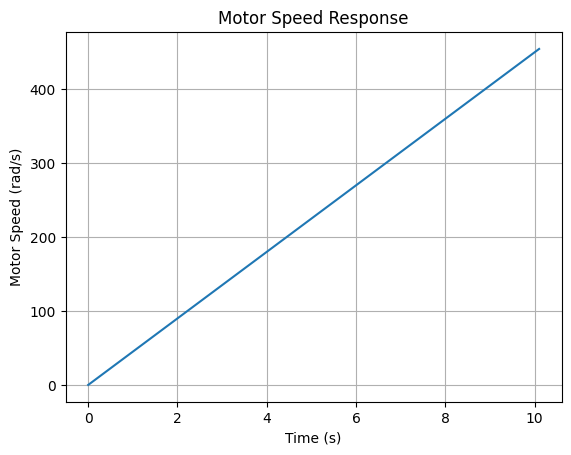

In [5]:
def plot_speed_response(speeds, dt):
    time = [i * dt for i in range(len(speeds))]
    plt.plot(time, speeds)
    plt.xlabel('Time (s)')
    plt.ylabel('Motor Speed (rad/s)')
    plt.title('Motor Speed Response')
    plt.grid(True)
    plt.show()

# Example usage
plot_speed_response(speeds, dt)

In [6]:
pid_controller = PIDController(Kp=1.0, Ki=0.1, Kd=0.01)

# Define setpoint (desired motor speed)
setpoint = 1.0  # rad/s

In [7]:
# Control loop
control_inputs = []
current_speed = 0.0

for speed in speeds:
    error = setpoint - current_speed
    control_action = pid_controller.compute_control_output(error, dt)
    current_speed += control_action
    control_inputs.append(control_action)

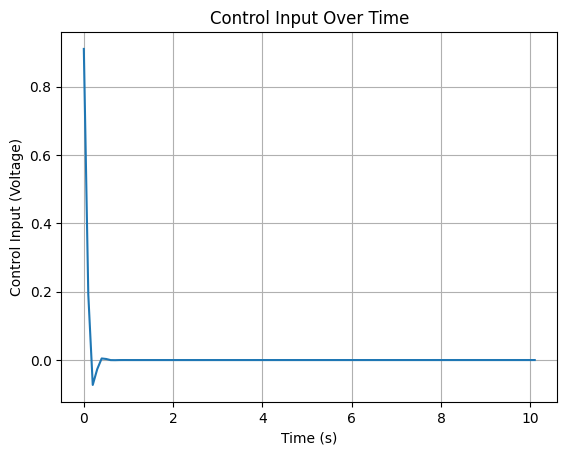

In [8]:
time = [i * dt for i in range(len(control_inputs))]
plt.plot(time, control_inputs)
plt.xlabel('Time (s)')
plt.ylabel('Control Input (Voltage)')
plt.title('Control Input Over Time')
plt.grid(True)
plt.show()